In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

In [2]:
# Import the mnist data by using load_data method.
# It should return four arguments: 
# training set and its label, AND, testing set and its label 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

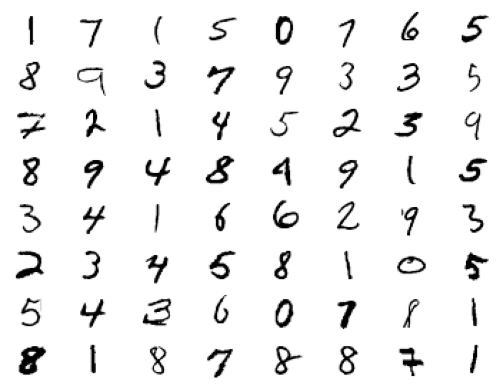

In [3]:
# Ploting some images
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(X_train[randint(0, X_train.shape[0])], cmap = 'Greys')
    
plt.show()

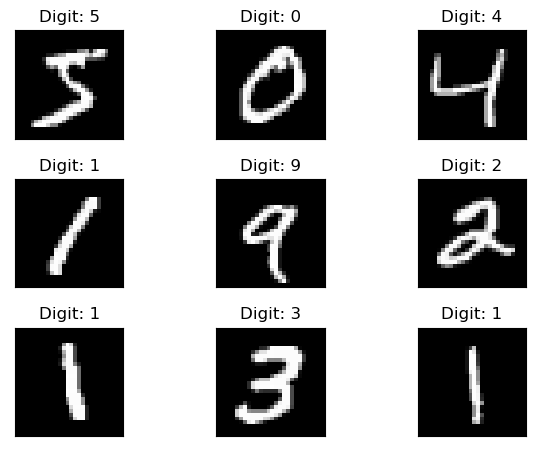

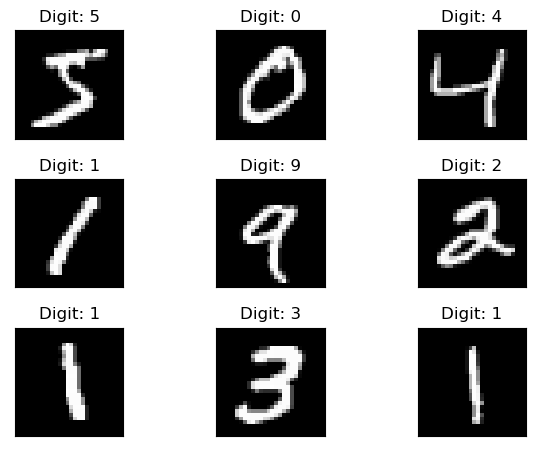

In [4]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [5]:
# Feature dimensions
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data to speed up the training and reduce the chance of becoming stuck
# in local optima since we are using Stochastic Gradient Desent to find optimal weights
# for network
X_train /= 255
X_test /= 255

In [6]:
# Defining the total classes
n_classes = 10

# The labels need to be encoded to categorical by using one-hot encoding.
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [7]:
print("\nX_train:\n", X_train)
print("\nX_test:\n", X_test)
print("\nY_train:\n", Y_train)
print("\nY_test:\n", Y_test)


X_train:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

X_test:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y_train:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

Y_test:
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print("Size of train label: ", Y_train.shape)
print("Size of test labvel: ",Y_test.shape)

Size of train label:  (60000, 10)
Size of test labvel:  (10000, 10)


In [9]:
# Model
model = Sequential([
    Dense(units = 60, activation = 'relu', input_shape = (784,)),
    Dense(units = 60, activation = 'sigmoid'),
    Dense(units = 10, activation = 'softmax')
])



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                47100     
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 51,370
Trainable params: 51,370
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 128, validation_split = 0.1, verbose = 1)
_,accuracy = model.evaluate(X_train, Y_train)
print("Accuracy of training set is: %.2f" %(accuracy*100) )

Epoch 1/5


2023-04-03 22:43:01.137856: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


422/422 [==============================] - 1s 984us/step - loss: 0.6772 - accuracy: 0.8406 - val_loss: 0.2572 - val_accuracy: 0.9313
Epoch 2/5
422/422 [==============================] - 0s 819us/step - loss: 0.2594 - accuracy: 0.9270 - val_loss: 0.1784 - val_accuracy: 0.9508
Epoch 3/5
422/422 [==============================] - 0s 817us/step - loss: 0.1910 - accuracy: 0.9449 - val_loss: 0.1465 - val_accuracy: 0.9597
Epoch 4/5
422/422 [==============================] - 0s 805us/step - loss: 0.1511 - accuracy: 0.9557 - val_loss: 0.1231 - val_accuracy: 0.9663
Epoch 5/5
1875/1875 [==============================] - 1s 377us/step - loss: 0.1066 - accuracy: 0.9694
Accuracy of training set is: 96.94


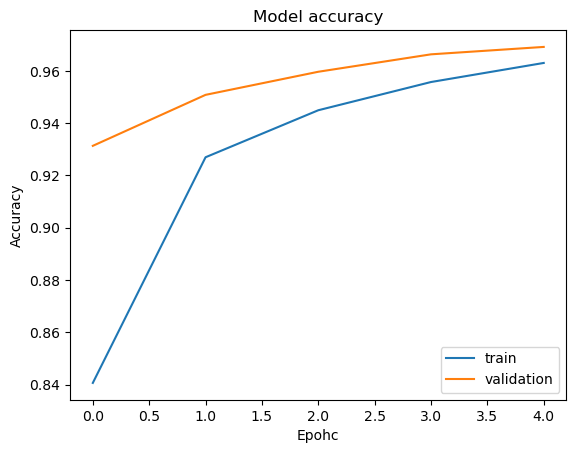

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epohc')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc= 'lower right')
plt.show()

In [13]:
# Make probability predictions with the model
predictions = model.predict(X_test)
print("Predictions: ", predictions)

loss_and_metrics = model.evaluate(X_test, Y_test)
print("Test Loss %.2f"  %(loss_and_metrics[0]))
print("Test Accuracy %.2f" %(loss_and_metrics[1]*100))

313/313 [==============================] - 0s 306us/step
Predictions:  [[1.5249614e-04 5.5003393e-04 2.0948744e-03 ... 9.8852855e-01
  1.1843904e-04 1.6625832e-03]
 [2.6266227e-04 4.5550978e-03 9.8779255e-01 ... 4.3795921e-05
  1.8190147e-03 4.9012142e-06]
 [2.6556781e-05 9.9433869e-01 1.2302260e-03 ... 1.7058412e-03
  8.4913365e-04 5.6212823e-05]
 ...
 [1.2034051e-05 2.1423000e-05 6.0608872e-05 ... 4.2905108e-04
  3.4226431e-04 1.9826232e-03]
 [2.4502649e-05 1.6985355e-04 1.2902018e-05 ... 3.1573178e-05
  1.0319725e-03 1.9195664e-05]
 [2.0316076e-04 3.3124179e-05 1.9696895e-04 ... 3.3740376e-05
  5.2025945e-05 2.3043083e-05]]
313/313 [==============================] - 0s 354us/step - loss: 0.1238 - accuracy: 0.9613
Test Loss 0.12
Test Accuracy 96.13


In [14]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


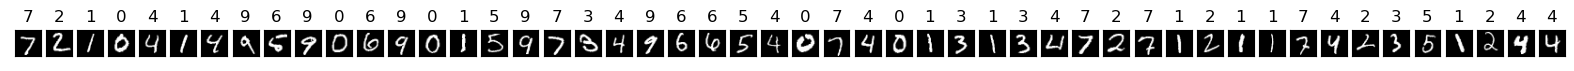

In [15]:
fig, axes = plt.subplots(ncols=50, sharex=False,
                         sharey=True, figsize=(20, 4))
X_test_im = X_test.reshape(10000, 28,28)
for i in range(50):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test_im[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

## Learning Curves

In [16]:
def plot_loss(loss, val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

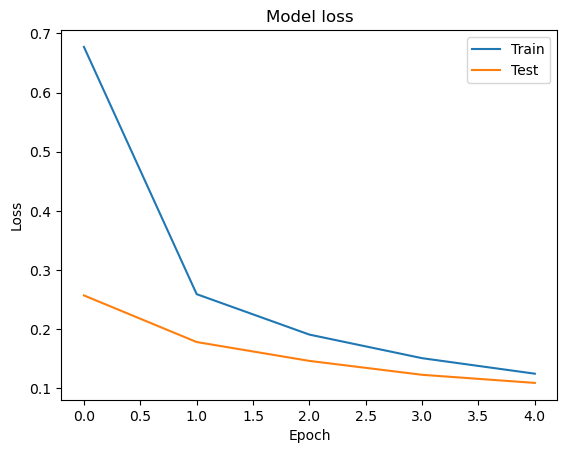

In [17]:
plot_loss(history.history['loss'],history.history['val_loss'])

### Do we need more data?

In [18]:
initial_weights = model.get_weights()

training_sizes = [125,  502,  879, 1255]
train_accs = []
test_accs = []


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

for size in training_sizes:
    # Get a fraction of training data (we are only care about the training data)
    X_train_frac, Y_train_frac = X_train[:size], Y_train[:size]
    model.set_weights(initial_weights)
    model.fit(X_train_frac, Y_train_frac, epochs = 5,
             callbacks = [EarlyStopping(monitor = 'loss', patience= 2)])
    train_accs.append(model.evaluate(X_train_frac, Y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, Y_test)[1])
                   


Epoch 1/5
4/4 [==============================] - 0s 879us/step - loss: 0.0775 - accuracy: 0.9760
Epoch 2/5
4/4 [==============================] - 0s 795us/step - loss: 0.0629 - accuracy: 0.9920
Epoch 3/5
4/4 [==============================] - 0s 930us/step - loss: 0.0419 - accuracy: 0.9920
Epoch 4/5
4/4 [==============================] - 0s 976us/step - loss: 0.0309 - accuracy: 0.9920
Epoch 5/5
313/313 [==============================] - 0s 365us/step - loss: 0.1504 - accuracy: 0.9527
Epoch 1/5
16/16 [==============================] - 0s 638us/step - loss: 0.1122 - accuracy: 0.9721
Epoch 2/5
16/16 [==============================] - 0s 649us/step - loss: 0.0637 - accuracy: 0.9900
Epoch 3/5
16/16 [==============================] - 0s 711us/step - loss: 0.0406 - accuracy: 0.9960
Epoch 4/5
16/16 [==============================] - 0s 703us/step - loss: 0.0316 - accuracy: 0.9960
Epoch 5/5
313/313 [==============================] - 0s 358us/step - loss: 0.1380 - accuracy: 0.9567
Epoch 1/5
28/2

In [20]:
def plot_results(list_1, list_2, training_list):
    plt.figure()
    plt.plot(training_list, list_1, marker = 'o')
    plt.plot(training_list, list_2, marker = 'o')
    plt.title('Accuracy vs Number of training examples')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of training example')
    plt.legend(['Training_acc', 'Test_acc'], loc='best')
    plt.show()

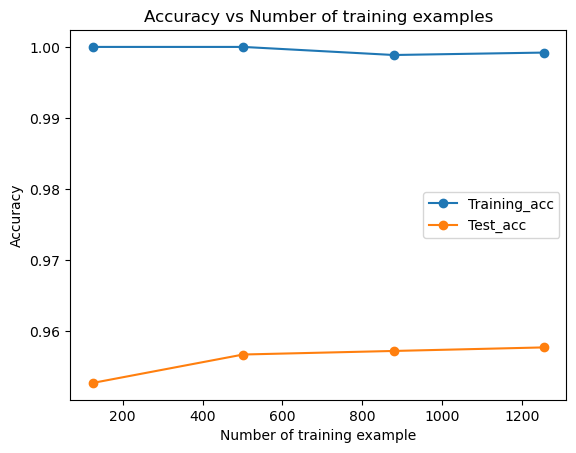

In [21]:
plot_results(train_accs, test_accs, training_sizes)

## Comparing activation function

In [22]:
def get_model(act_function):
    model = Sequential([
        Dense(units = 60, activation = act_function, input_shape = (784,)),
        #Dense(units = 60, activation = act_function),
        Dense(units = 10, activation = 'softmax')
    ])
    return model

In [23]:
# Activation function to try:
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
activation_results = {}

for act_funct in activations:
    model = get_model(act_funct)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    h_callback = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50, verbose = 0)
    
    activation_results[act_funct] = h_callback

In [24]:
val_loss_per_function = {k:v.history['val_loss'] for k,v in activation_results.items()}
val_loss_curves = pd.DataFrame(val_loss_per_function)

val_acc_per_function = {k:v.history['val_accuracy'] for k,v in activation_results.items()}
val_acc_curves = pd.DataFrame(val_acc_per_function)

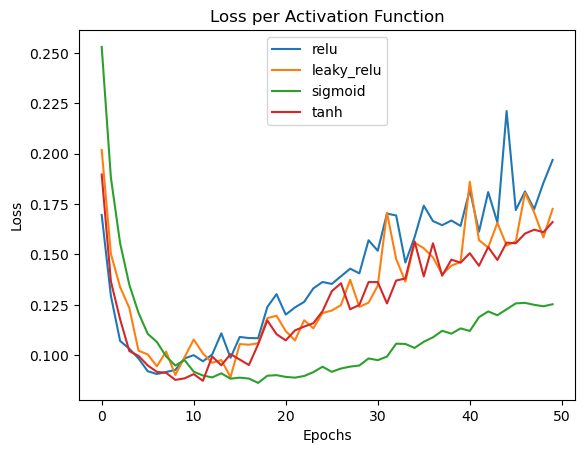

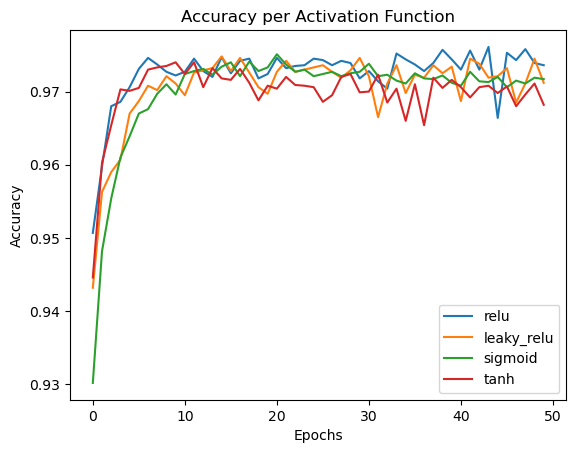

In [25]:
# Plot the curves
val_loss_curves.plot(xlabel = 'Epochs', ylabel = 'Loss', title = 'Loss per Activation Function')
val_acc_curves.plot(xlabel = 'Epochs', ylabel ='Accuracy', title = 'Accuracy per Activation Function')
plt.show()

In [26]:
def get_model_hidden(act_function):
    model = Sequential([
        Dense(units = 60, activation = 'relu', input_shape = (784,)),
        Dense(units = 60, activation = act_function),
        Dense(units = 10, activation = 'softmax')
    ])
    return model

In [27]:
# Activation function to try:
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
activation_results = {}

for act_funct in activations:
    model = get_model_hidden(act_funct)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    h_callback = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50, verbose = 0)
    
    activation_results[act_funct] = h_callback

In [28]:
val_loss_per_function = {k:v.history['val_loss'] for k,v in activation_results.items()}
val_loss_curves = pd.DataFrame(val_loss_per_function)

val_acc_per_function = {k:v.history['val_accuracy'] for k,v in activation_results.items()}
val_acc_curves = pd.DataFrame(val_acc_per_function)

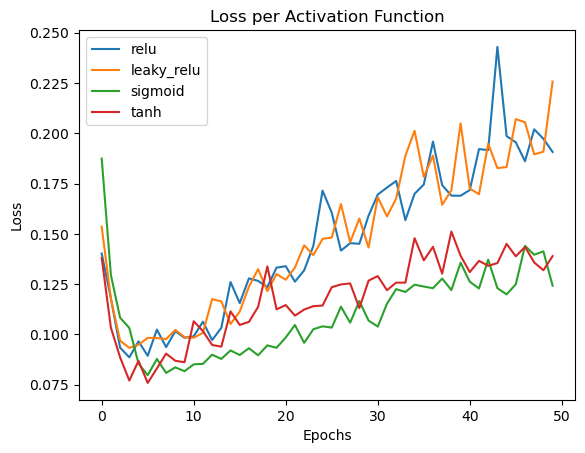

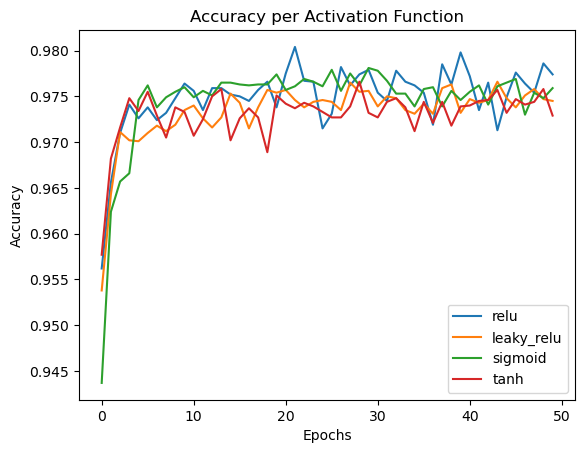

In [29]:
# Plot the curves
val_loss_curves.plot(xlabel = 'Epochs', ylabel = 'Loss', title = 'Loss per Activation Function')
val_acc_curves.plot(xlabel = 'Epochs', ylabel ='Accuracy', title = 'Accuracy per Activation Function')
plt.show()

## Batch and Normalization

In [30]:
# Import batch normalization from keras layers
from tensorflow.keras.layers import BatchNormalization

In [31]:
#from tensorflow.keras.initializers import kernel_initializers
# Build deep network
batchnorm_model  = Sequential()
batchnorm_model.add(Dense(50, input_shape = (784, ), activation = 'relu',kernel_initializer = 'normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add((Dense(50, activation = 'relu', kernel_initializer = 'normal')))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add((Dense(50, activation = 'relu', kernel_initializer = 'normal')))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation = 'softmax', kernel_initializer = 'normal'))                   

In [40]:
batchnorm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 50)                39250     
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_2 (Batc  (None, 50)              

In [33]:
# Compile the model with sgd
batchnorm_model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
def compare_histories_acc(h1,h2):
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title("Batch Normalization Effects")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
    plt.show()

In [35]:
# Build standard model
standard_model = Sequential()
standard_model.add(Dense(50, input_shape = (784, ), activation = 'relu'))
standard_model.add(Dense(50, activation = 'relu'))
standard_model.add(Dense(50, activation = 'relu'))
standard_model.add(Dense(10, activation = 'softmax'))

In [36]:
standard_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                39250     
                                                                 
 dense_28 (Dense)            (None, 50)                2550      
                                                                 
 dense_29 (Dense)            (None, 50)                2550      
                                                                 
 dense_30 (Dense)            (None, 10)                510       
                                                                 
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


In [37]:
standard_model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics= ['accuracy'])
# Train standard model, storing its history callback
h1_callback = standard_model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 25, verbose = 0)

In [38]:
# Train the batch normalized model, and store its history in h2_callback
h2_callback = batchnorm_model.fit(X_train , Y_train, validation_data = (X_test, Y_test), epochs = 25, verbose = 0)

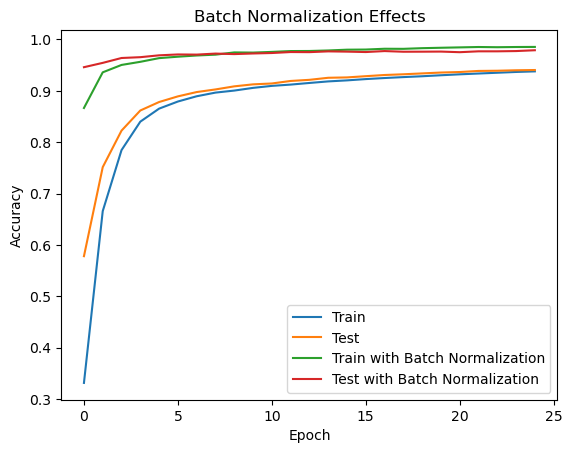

In [39]:
# Compare histories_ACC 
compare_histories_acc(h1_callback,h2_callback)